In [1]:
%matplotlib widget
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import imageio
import os

## Figure out which image is which core

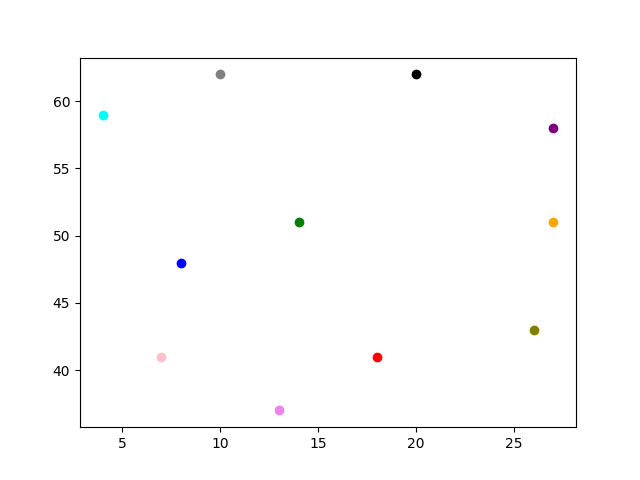

In [2]:
core_x = [18, 14, 8, 13, 7, 20, 10, 4, 27, 27, 26]
core_y = [41, 51, 48, 37, 41, 62, 62, 59, 51, 58, 43]

col_list = ['red', 'green', 'blue', 'violet', 'pink', 'black', 'gray', 'cyan', 'orange', 'purple', 'olive'] #, 'brown']

for i in range(11):
    plt.scatter(core_x[i], core_y[i], color=col_list[i])
plt.show()

In [2]:
def rebin(arr, new_shape):
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

def plot_with_cores(core_locs,chosen_pic, core_size):
    fig2 = plt.figure(figsize=(9,7))
    ax2 = fig2.add_subplot(111)
    ax2.imshow(chosen_pic, cmap='Reds')

    for i in range(len(core_locs)):
        if i%2 == 0:
            col = 'black'
        else:
            col = 'black'
        patch_to_add = plt.Circle(core_locs[i], core_size, color=col, fill=False, linewidth=3.0,linestyle='--')
        ax2.add_patch(patch_to_add)
    #plt.axis('off')
    #ax2.set_axis_off()
    ax2.xaxis.set_major_locator(MultipleLocator(10))
    ax2.xaxis.set_minor_locator(MultipleLocator(5))
    ax2.yaxis.set_major_locator(MultipleLocator(10))
    ax2.yaxis.set_minor_locator(MultipleLocator(5))
    plt.grid(which='both')
    plt.show()
    return

# Can plot meshgrid to ensure each RGB component is not saturated
def RGB_plotter(chosen_pic):
    fig_prop = plt.figure(figsize=(12,10))
    ax_prop = plt.axes(projection='3d')

    x = np.arange(np.shape(chosen_pic)[1])
    y = np.arange(np.shape(chosen_pic)[0])
    X, Y = np.meshgrid(x, y)
    ax_prop.plot_wireframe(X,Y,chosen_pic[:,:,2], color='blue')
    ax_prop.plot_wireframe(X,Y,chosen_pic[:,:,1],color='green')
    ax_prop.plot_wireframe(X,Y,chosen_pic[:,:,0],color='red')

    plt.show()
    return

def RGB_diff(chosen_pic):
    blue_red_diff = np.max(chosen_pic[:,:,0]) - np.max(chosen_pic[:,:,2])
    return blue_red_diff
    
# This function sums up the grayscale values in each core
# Giving an overall intensity value
def sum_intensity_in_cores(core_list, core_size, chosen_pic):
    
    copy_pic = np.copy(chosen_pic)
    x , y = np.ogrid[:copy_pic.shape[0] , :copy_pic.shape[1]] 

    core_sum_array = np.zeros(12)

    for core in range(12):
        dist_from_core_center = np.sqrt((x-core_list[core][1])**2 + (y-core_list[core][0])**2)
        circ_radius= core_size

        selection = dist_from_core_center < circ_radius
        core_sum_array[core] = sum(copy_pic[selection])
        copy_pic[selection] = 0.0
    return core_sum_array

def onclick(event):
    pos.append([event.xdata,event.ydata])


In [3]:
calibration_pic = imageio.imread('../Fibre Design/Single Shot Data/distance measurement 2/44.2 calibration.jpg', pilmode='L')
total_rows, total_columns = calibration_pic.shape

binned_pic = rebin(calibration_pic, (total_rows//2, total_columns//2))
binned_pic = rebin(binned_pic, (total_rows//4, total_columns//4))

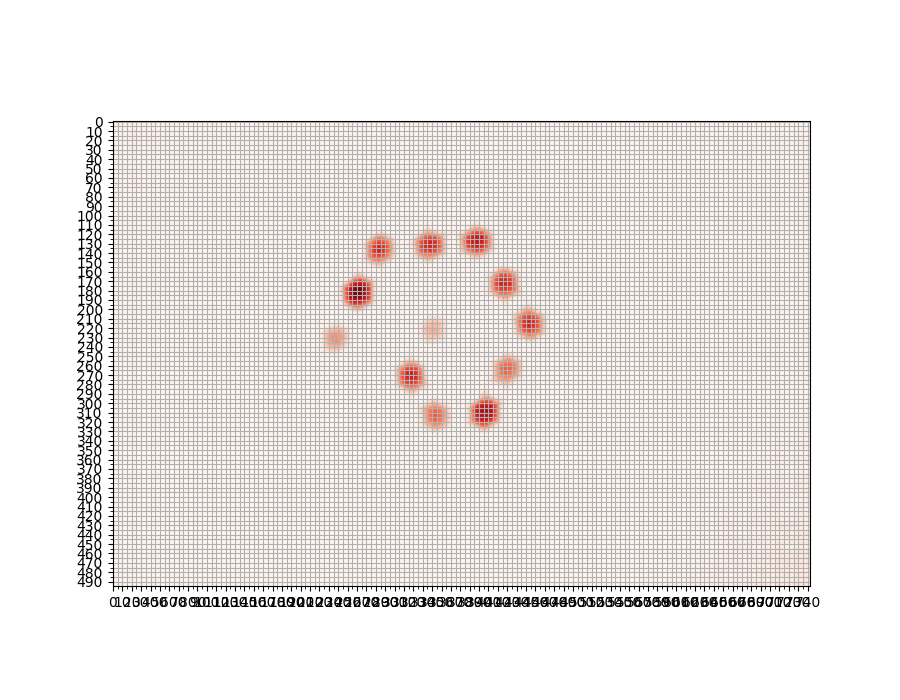

In [13]:
pos = []
fig1 = plt.figure(figsize=(9,7))
ax1 = fig1.add_subplot(111)

ax1.imshow(binned_pic, cmap='Reds')
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(MultipleLocator(5))

plt.grid(which='both')

fig1.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [14]:
core_locs = []
if len([[int(i),int(j)] for i,j in pos]) == 12:
    core_locs.append([[int(i),int(j)] for i,j in pos])
    print([[int(i),int(j)] for i,j in pos])

[[338, 221], [316, 267], [343, 313], [394, 308], [420, 262], [443, 216], [416, 170], [385, 127], [336, 130], [283, 135], [259, 181], [235, 231]]


## Find winding number for each core

In [93]:
pic_list_1 = []

folder = '../Fibre Design/Single Shot Data/16_11_22/90.7cm/'
core_list = []

for filename in os.listdir(folder):
    print(filename)
    if filename[-3:] == 'jpg':
        img = imageio.imread(os.path.join(folder, filename), pilmode ='F')
        pic_list_1.append(img)
        core_list.append((filename))
    
core_list = core_list[2:]
print(core_list)
binned_pic_list_1 = []

for pic in pic_list_1:
    bin_once = rebin(pic,(np.shape(pic)[0]//2, np.shape(pic)[1]//2))
    bin_twice = rebin(bin_once, (np.shape(bin_once)[0]//2, np.shape(bin_once)[1]//2))
    binned_pic_list_1.append(bin_twice)

binned_noise_pic = binned_pic_list_1[0]
binned_list_without_noise_1 = []

for pic in binned_pic_list_1[2:]:
    binned_list_without_noise_1.append(np.abs(pic-binned_noise_pic))
    
# core_locs = []

background.jpg
calibration.jpg
image 1.jpg
image 10.jpg
image 11.jpg
image 12.jpg
image 2.jpg
image 3.jpg
image 4.jpg
image 5.jpg
image 6.jpg
image 7.jpg
image 8.jpg
image 9.jpg
['image 1.jpg', 'image 10.jpg', 'image 11.jpg', 'image 12.jpg', 'image 2.jpg', 'image 3.jpg', 'image 4.jpg', 'image 5.jpg', 'image 6.jpg', 'image 7.jpg', 'image 8.jpg', 'image 9.jpg']


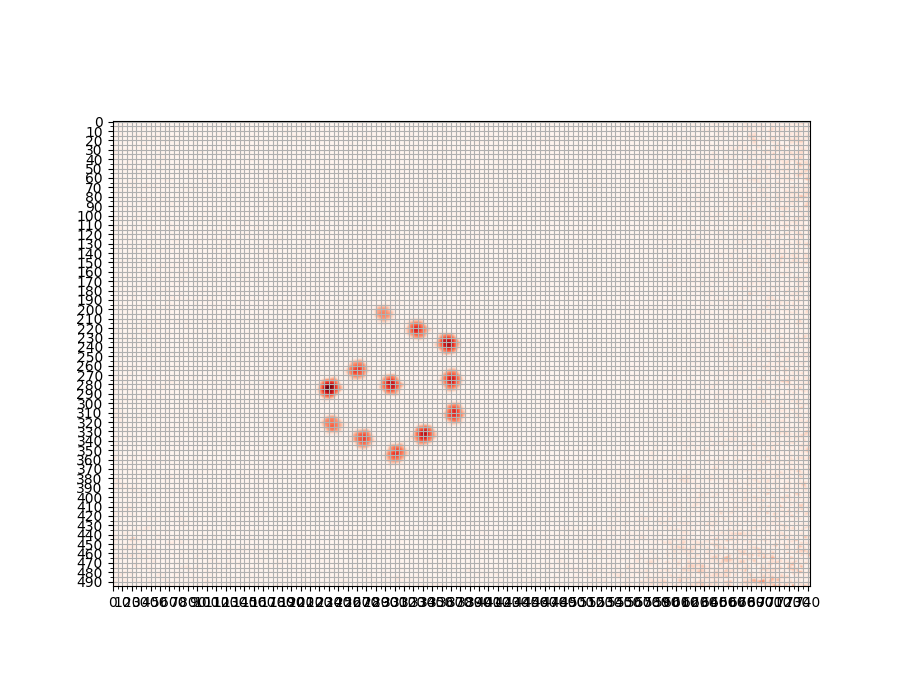

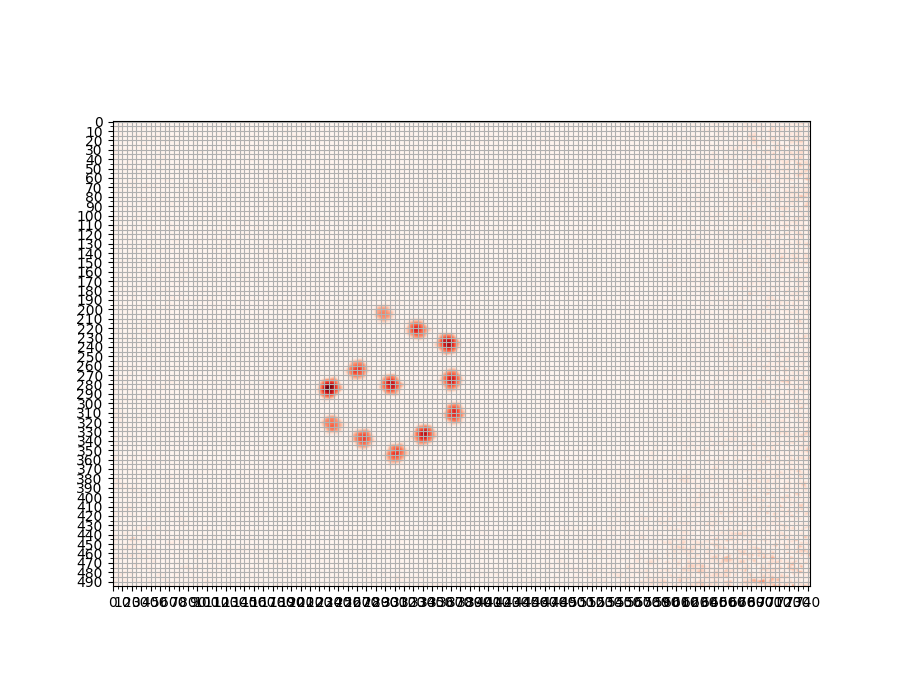

In [97]:
pic_no = 10
pos = []
fig1 = plt.figure(figsize=(9,7))
ax1 = fig1.add_subplot(111)

ax1.imshow(binned_list_without_noise_1[pic_no], cmap='Reds')
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(MultipleLocator(5))

plt.grid(which='both')

fig1.canvas.mpl_connect('button_press_event', onclick)
fig1.show()

In [98]:

if len([[int(i),int(j)] for i,j in pos]) == 12:
    core_locs.append([[int(i),int(j)] for i,j in pos])
    print([[int(i),int(j)] for i,j in pos])

[[296, 279], [259, 263], [227, 283], [231, 321], [264, 338], [301, 355], [330, 331], [364, 308], [361, 274], [355, 235], [323, 223], [288, 207]]


In [17]:
print(len(core_locs))

1


In [63]:
def calc_i_d(unit_cell_index, core_intensities):
    a_norm = core_intensities[::2]
    b_norm = core_intensities[1::2]
    diff_list = a_norm - b_norm
    scaled_diff_list = diff_list*unit_cell_index
    unweighted = np.sum(diff_list)
    i_d = np.sum(scaled_diff_list)        
    return i_d, unweighted

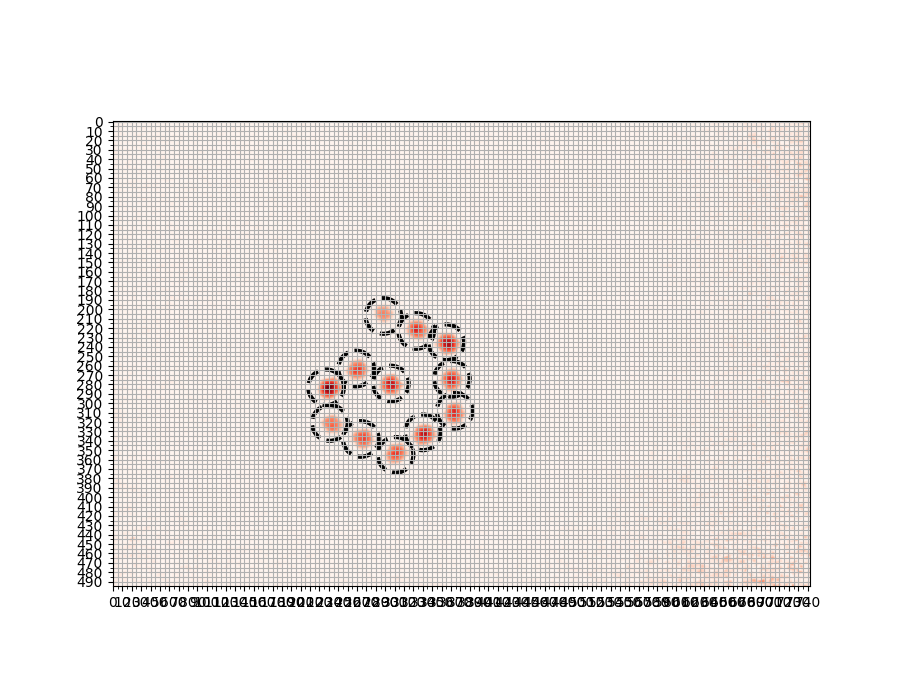

[11554.12345973  9230.81265616 14524.64379573  7393.29128855
  9179.36392935  9513.41110504 11962.88177427 10371.96716286
 11216.59401479 13236.30590393  9925.96562474  5670.59311436]
image 8.jpg
Winding Number: 0.6039945434869509


In [99]:
chosen_core = 10
plot_with_cores(core_locs[1], binned_list_without_noise_1[chosen_core], 19)
intensity_list = sum_intensity_in_cores(core_locs[1], 19, binned_list_without_noise_1[chosen_core])
print(intensity_list)
normalised_intensity_list = intensity_list/np.sum(intensity_list)
normalised_intensity_list[normalised_intensity_list < 0] = 0

print(core_list[chosen_core])
print('Winding Number: {}'.format([2*i for i in calc_i_d(np.arange(1,7), normalised_intensity_list)][0]))
# print(calc_i_d(np.arange(1,7), normalised_intensity_list))

In [10]:
core_intensity_list = []
# j = 0
for j,image in enumerate(binned_list_without_noise_1):
    intensity = sum_intensity_in_cores(core_locs[j], 21, image)
    normalised_intensity = intensity/np.sum(intensity)
    normalised_intensity[normalised_intensity < 0] = 0
    core_intensity_list.append(normalised_intensity)



IndexError: list index out of range

In [35]:
def calc_i_d_list(unit_cell_index, core_intensity_lists):
    i_d_list = []
    unweighted_list = []
    for norm_vals in core_intensity_lists:
        a_norm = norm_vals[::2]
        b_norm = norm_vals[1::2]
        diff_list = a_norm - b_norm
        scaled_diff_list = diff_list*unit_cell_index

        i_d = np.sum(scaled_diff_list)
        unweighted_list.append(np.sum(diff_list))
        i_d_list.append(i_d)
        
    return i_d_list, unweighted_list

i_d_list, unweighted_id = calc_i_d_list(np.arange(1,7), core_intensity_list)

In [57]:
for i in range(len(core_list)):
    print(core_list[i][:-4]+' I_d: {:.2f}'.format(2*i_d_list[i]))

winding_num_list = np.multiply(2, i_d_list)

core 1 I_d: 1.03
core 10 I_d: -0.06
core 11 I_d: -1.94
core 12 I_d: -2.18
core 2 I_d: 0.48
core 3 I_d: 1.15
core 4 I_d: 0.44
core 5 I_d: 0.94
core 6 I_d: 0.84
core 7 I_d: 0.66
core 8 I_d: 0.65
core 9 I_d: -1.25


In [60]:
col_pic_list = []
for filename in os.listdir(folder):
    print(filename)
    if filename[-3:] == 'jpg':
        img = imageio.imread(os.path.join(folder, filename), pilmode ='RGB')
        col_pic_list.append(img)
col_pic_list = col_pic_list[2:]

background.jpg
calibration.jpg
core 1.jpg
core 10.jpg
core 11.jpg
core 12.jpg
core 2.jpg
core 3.jpg
core 4.jpg
core 5.jpg
core 6.jpg
core 7.jpg
core 8.jpg
core 9.jpg
Thumbs.db


In [61]:
s_to_n_list = []
for i in range(len(col_pic_list)):
    s_to_n_list.append(RGB_diff(col_pic_list[i]))

In [62]:
print(len(s_to_n_list))

12


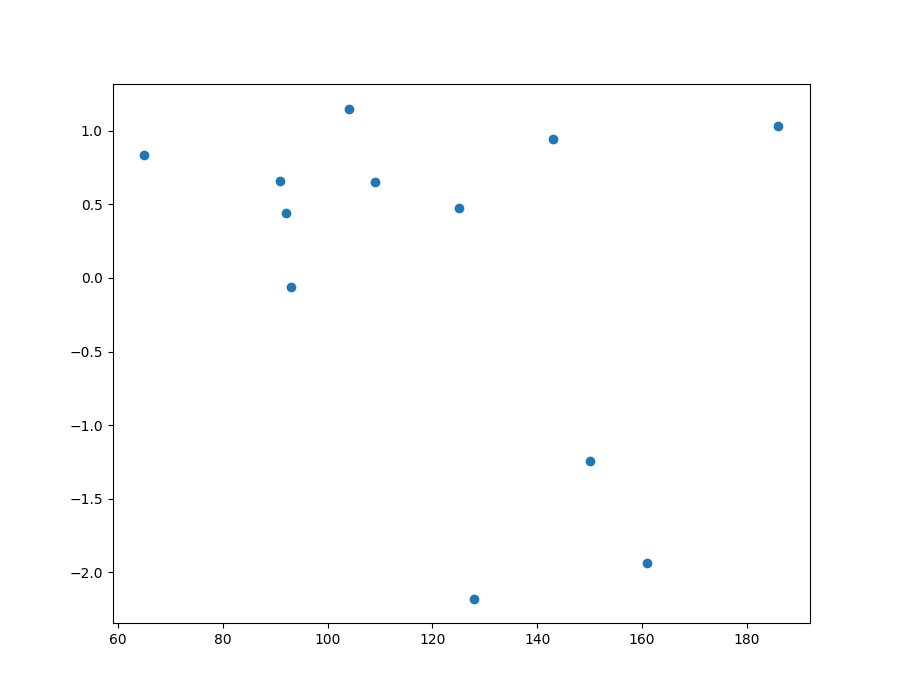

In [65]:
fig_noise_to_num = plt.figure(figsize=(9,7))
ax_noise_to_num = fig_noise_to_num.add_subplot(111)

ax_noise_to_num.scatter(s_to_n_list, winding_num_list)
plt.show()

# Find winding number for a range of lengths

In [10]:
pic_list_length = []

folder = '../Fibre Design/Single Shot Data/varying length/'
lengths = []

pic_list_length.append(imageio.imread('../Fibre Design/Single Shot Data/distance measurement 2/44.2 image.jpg',pilmode='F'))
pic_list_length.append(imageio.imread('../Fibre Design/Single Shot Data/distance measurement 2/background.jpg',pilmode='F'))
# for filename in os.listdir(folder):
#     print(filename)
#     if filename[-3:] == 'jpg':
#         img = imageio.imread(os.path.join(folder, filename), pilmode ='F')
#         pic_list_length.append(img)
#         lengths.append(filename[:-7])
# lengths = [float(i) for i in lengths[:-1]]

binned_pic_list_length = []

for pic in pic_list_length:
    bin_once = rebin(pic,(np.shape(pic)[0]//2, np.shape(pic)[1]//2))
    bin_twice = rebin(bin_once, (np.shape(bin_once)[0]//2, np.shape(bin_once)[1]//2))
    binned_pic_list_length.append(bin_twice)

binned_noise_pic_length = binned_pic_list_length[-1]
binned_list_without_noise_length = []

for pic in binned_pic_list_length[:-1]:
    noiseless = pic-binned_noise_pic_length
    binned_list_without_noise_length.append(noiseless.clip(min=0))

core_locs_length = []

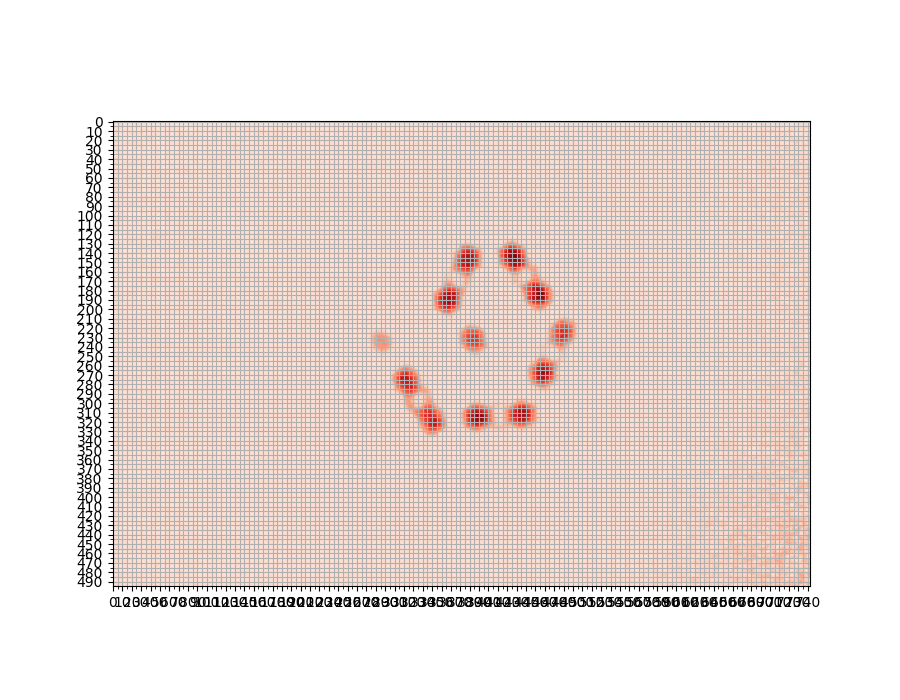

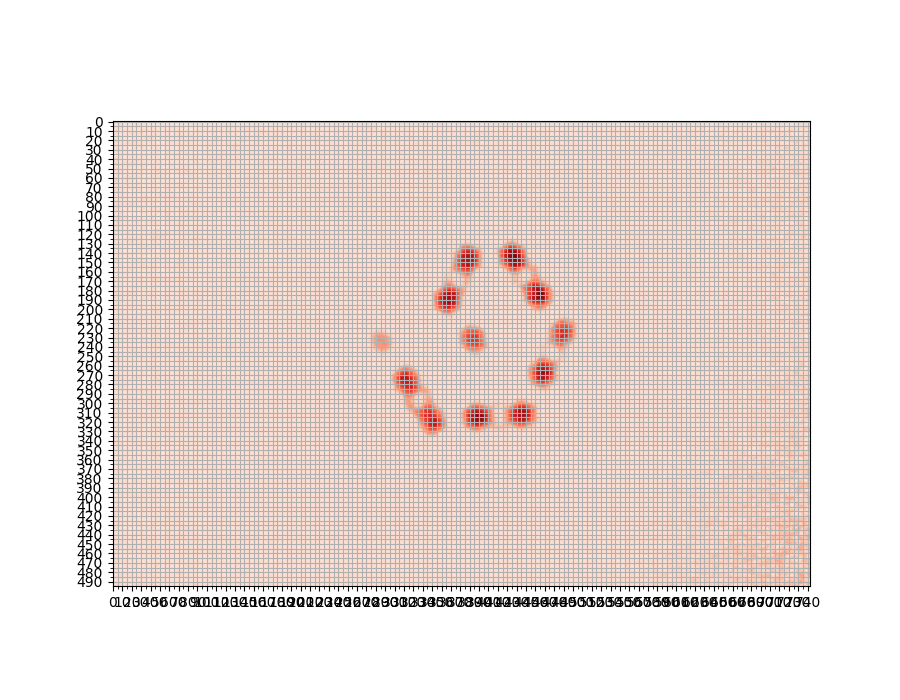

In [30]:
pic_no = 9
pos = []
fig1 = plt.figure(figsize=(9,7))
ax1 = fig1.add_subplot(111)

ax1.imshow(binned_list_without_noise_length[pic_no], cmap='Reds')
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(MultipleLocator(5))

plt.grid(which='both')

fig1.canvas.mpl_connect('button_press_event', onclick)
fig1.show()

In [31]:

if len([[int(i),int(j)] for i,j in pos]) == 12:
    core_locs_length.append([[int(i),int(j)] for i,j in pos])
    print([[int(i),int(j)] for i,j in pos])

[[384, 230], [354, 188], [378, 145], [426, 143], [451, 182], [477, 226], [454, 265], [435, 309], [387, 313], [338, 318], [312, 275], [285, 237]]


In [16]:
core_intensity_list_length = []
# j = 0
for j,image in enumerate(binned_list_without_noise_length[0]):
    intensity = sum_intensity_in_cores(core_locs, 21, image)
    normalised_intensity = intensity/np.sum(intensity)
    normalised_intensity[normalised_intensity < 0] = 0
    core_intensity_list_length.append(normalised_intensity)



IndexError: tuple index out of range

In [43]:
i_d_list_length, unweighted_id_length = calc_i_d_list(np.arange(1,7), core_intensity_list_length)
winding_length = np.multiply(i_d_list_length, 2)
print(winding_length, lengths)

lengths_with_glue = [44.2, 42.3, 40.3, 37.2, 34.7, 32.3, 29.7, 27.8, 25.4, 23.5]
winding_with_glue = [0.896,-0.121,2.265,0.662,-0.087,-0.834,0.125,-0.935,0.371,1.401]


[ 0.87573123 -0.26291742  1.32549505 -0.51236568  0.04221999 -0.49320133
  1.96994061  0.94853969  0.72407722  0.9393058 ] [24.0, 26.3, 28.2, 30.7, 32.3, 35.0, 36.6, 38.4, 40.2, 42.0]


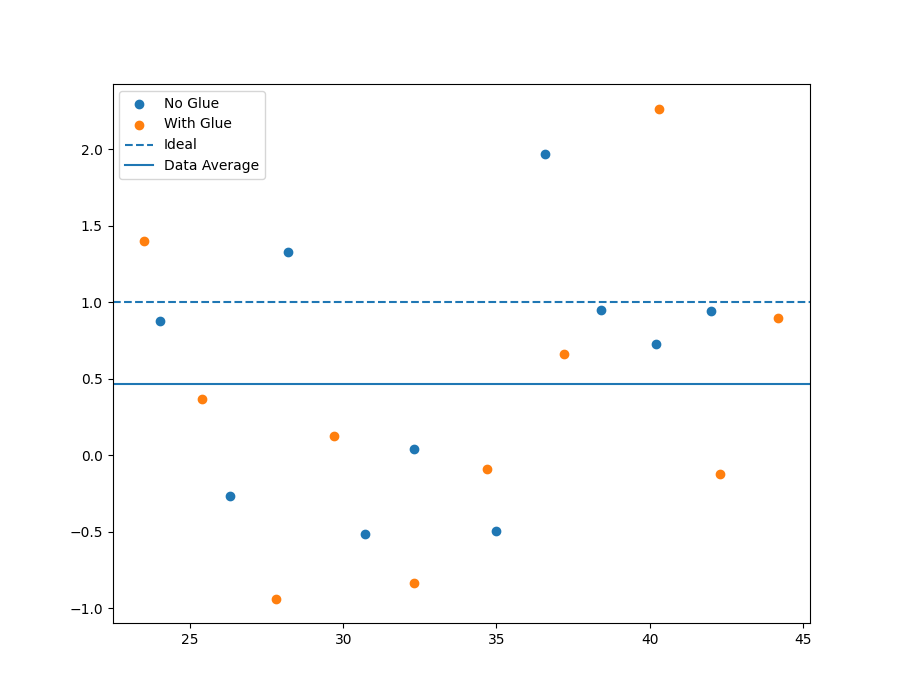

In [47]:
fig_num_length = plt.figure(figsize=(9,7))
ax_num_length = fig_num_length.add_subplot(111)

ax_num_length.scatter(lengths, winding_length,label='No Glue')
ax_num_length.scatter(lengths_with_glue, winding_with_glue, label='With Glue')
ax_num_length.axhline(1.0, ls= '--', label='Ideal')
ax_num_length.axhline((np.mean(winding_with_glue)+np.mean(winding_length))/2, label='Data Average')
plt.legend()
plt.show()